# 7.1 文本分析——NLTK
[NLTK](https://www.nltk.org/install.html)是一个用于建立Python程序来处理人类语言的工具库。
它为50多个语料库和词汇资源（如WordNet）提供了易于使用的接口，以及一套用于分类、标记化、词根化、标签化、解析和语义推理的文本处理库。

## 1. 分词

分词，意思是分割句子与单词。我们使用NLTK库的单词分割器（tokenizer）对句子`At eight o'clock on Thursday morning, Arthur didn't feel very good.`进行分词：

In [1]:
%pprint
import nltk
sentence = """At eight o'clock on Thursday morning,
             Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence, language='english')
tokens

Pretty printing has been turned OFF
NLTK库信息： {'nltk_data path': 'nltk/nltk_data', 'nltk_data included': ['tokenizers/punkt', 'taggers/averaged_perceptron_tagger', 'taggers/universal_tagset', 'corpora/.DS_Store', 'corpora/inaugural']}


['At', 'eight', "o'clock", 'on', 'Thursday', 'morning', ',', 'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']

## 2. 词性标注
早在小学时，你就学会了名词、动词、形容词和副词之间的区别。这些 "词类 "并不只是语法学家的闲置发明，而可以广泛应用在各类语言处理任务中[2]。本部分我们来了解如何自动标记文本中的每个词的词性，然后分析文本中词语的词性分布。


In [2]:
tagged = nltk.pos_tag(tokens, tagset='universal')
tagged[7:]

[('Arthur', 'NOUN'), ('did', 'VERB'), ("n't", 'ADV'), ('feel', 'VERB'), ('very', 'ADV'), ('good', 'ADJ'), ('.', '.')]

### 练习
1. 创建一个字符串变量，包含一个完整的英文句子，例如描述自己当前的状态
2. 应用NLTK库的word_tokenize方法对上面的字符串进行分词
3. 对分词后的单词进行词性标注

## 3. 词频统计

想象一下，你如何去寻找一本书中出现频率最高的50个词。手动的方法是对每个词汇项目进行统计，如下图中所示，例如the出现了3*5+4=19次。
<center><img src="image/tally.png" alt="image/tally.png" width="304" height="228"></center>

以上通过手工统计是相当费时费力的，下面我们用Python里的for循环，遍历一段文本，统计并绘制其词频分布。

In [3]:
from nltk.tokenize import word_tokenize
sentence = "a, b, c, d, a, c, d, c, d"
fdist = {}
for word in word_tokenize(sentence):
    w = word.lower()
    if w not in fdist: fdist[w] = 0
    fdist[w] += 1
fdist

{'a': 2, ',': 8, 'b': 1, 'c': 3, 'd': 3}

Text(0.5, 1.0, 'Frequency Distribution of Words')

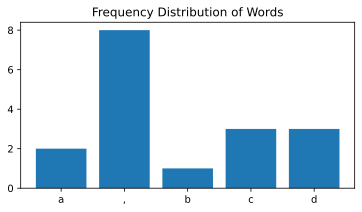

In [4]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

fig, ax= plt.subplots(figsize=(6,3))
ax.bar(fdist.keys(), fdist.values())
ax.set_title('Frequency Distribution of Words')

## 3. 语料库的文本分析


### 3.1 读取NLTK内置的语料库

NLTK内置了对几十个[语料库和训练好的模型](https://www.nltk.org/nltk_data/)的支持，列举如下：

|语料库|解释|
|---|---|
|gutenberg|从[古腾堡计划](http://www.gutenberg.org/)电子文本档案中选出的一小部分文本，其中包含了大约25000本免费的电子书|
|webtext|少量网络文本包括火狐浏览器讨论区的内容、对话、《加勒比海盗》的电影剧本、个人广告和酒评|
|nps_chat|[布朗语料库](http://icame.uib.no/brown/bcm-los.html)是第一个百万字级的英语电子语料库(1961年创建)。该语料库包含来自500个来源的文本，如新闻、社论等|
|brown|一个百万词级别的英语电子语料库，这个语料库包含 500 个不同来源的文本，按文体分类有新闻、社论等|
|reuters|路透社语料库，上万篇新闻方档，约有 1 百万字，分 90 个主题|
|inaugural|美国总统就职演说语料库，包含55个文本的集合|

我们以语料库inaugural为例，读取美国总统就职演说语料库，其包含从1789年美国华盛顿(Washington)总统，到2021年美国拜登(Biden)总统的共55届总统就职演说的文本。

In [5]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

如果需要提取语料库2021年美国拜登(Biden)总统的演说文本，使用下列方法：

In [6]:
inaugural.words('2021-Biden.txt')

['Chief', 'Justice', 'Roberts', ',', 'Vice', ...]

### 练习：关于美国总统就职演说中提及“战争”的次数
1. 请问Biden的就职演说中关于关键词'war'的频数有多少？
2. 请绘制历届总统的就职演说中关键词'war'的频数随年份的变化。  
Tips: 注意，每个文本的年份都出现在其文件名中。使用fileid[:4]，提取前四个字符，即可获得年份。

## 参考
[1] NLTK官网:https://www.nltk.org/install.html  
[2] Natural Language Processing with Python：https://www.nltk.org/book/

## 练习答案
### 练习：关于美国总统就职演说中提及“战争”的次数
1. 请问Biden的就职演说中关于关键词'war'的频数有多少？
2. 请绘制历届总统的就职演说中关键词'war'的频数随年份的变化。  
Tips: 注意，每个文本的年份都出现在其文件名中。使用fileid[:4]，提取前四个字符，即可获得年份。

In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import inaugural
sentence = ' '.join(inaugural.words('2021-Biden.txt'))
sentence
fdist = {}
for word in word_tokenize(sentence):
    w = word.lower()
    if w not in fdist: fdist[w] = 0
    fdist[w] += 1

In [8]:
fdist['war']

7

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import inaugural
fdist = {}
for i in inaugural.fileids():
    sentence = ' '.join(inaugural.words(i))
    fdist[i[:4]] = 0
    for word in word_tokenize(sentence):
        w = word.lower()
        if w=='war': 
            fdist[i[:4]] += 1

Text(2021, 8, '2021-Biden')

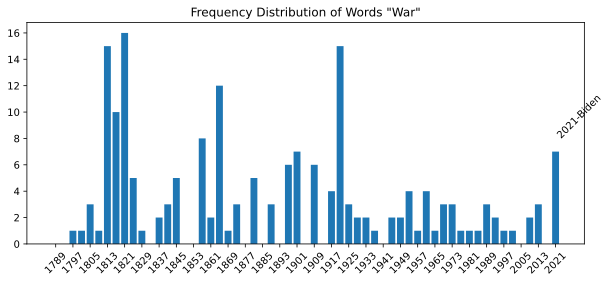

In [13]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax= plt.subplots(figsize=(10,4))
ax.bar(fdist.keys(), fdist.values())
n_sample = len(fdist)
xticks = range(0, n_sample, 2)
ax.set_xticks(xticks, np.array(list(fdist.keys()))[xticks], rotation = 45)
ax.set_title('Frequency Distribution of Words "War"')
ax.text('2021', 8, '2021-Biden', rotation=45)  #添加文本